#### optimization gradient descent algorithms
1. Momentum algorithm (thuật toán tăng tốc GD)
    - Tại vị trí t khi gặp local minimum thi GD không thể di chuyển thêm nữa, việc cần làm ở đây là chúng ta thêm "Đà" để GD có thể tiếp tục di chuyển. Gọi đại lượng đó là vận tốc. 
    v(t) = v(t-1) + anpha*đạo hàm(vitri) || ở đây vt mang ý nghĩa của cả vt và đạo hàm 

    - vị trí mới = vị trí cũ - v(t) : dấu trừ ở đây là đi nghược với đạo hàm 
2. Nesterov accelerated gradient (NAG) || ý tưởng giúp momentum dừng lại nhanh hơn (thuật toán tăng tốc GD)
    - Khi tới gần đích, momentum vẫn mất khá nhiều thời gian để dừng lại do vẫn còn "đà". 
    - Ý tưởng cơ bản : dự đoán hướng đi trong tương lai, tức là nhìn trước 1 bước. Cụ thể, nếu sử dụng số hạng momentum v(t-1) để cập nhất thì ta có thể xấp xỉ vị trí tiếp theo của hòn bi là theta - v(t-1). Thay vì sử dụng gradient của điểm hiện tại , NAG đi trước 1 bước, sử dụng gradient của điểm tiếp theo.
    - CT cập nhật như sau : 
    v(t) = vt(t-1) + anpha * đạo hàm(vitri - v(t-1)) 
    - vị trí mới = vị trí cũ - v(t) : dấu trừ ở đây là đi nghược với đào hàm 
    - Khác biệt là tính trước đạo hàm ở vị trí tiếp theo chứ không tính ở hiện tại 
3. Batch GD : 
    - thuật toán 1 và 2 đều thuộc batch GD. Batch ở đây được hiểu là tất cả. Tức là khi cập nhật w, chúng ta sử dụng tất cả các điểm dữ liệu xi 
    - Hạn chế đối và kém hiệu quả với csdl lớn, và online learning 
    - Online learning là khi csdl cập nhật liên tục, kèo theo mô hình phải thay đổi chút một để phù hợp với dữ liệu mới 

4. Stochastic Gradient Descent (SGD)
    - Trong thuật toán, tại 1 thời điểm, ta chỉ tính đạo hàm của hàm mất mát dựa trên chỉ 1 điểm dữ liệu xi rồi cập nhật W dựa trên đạo hàm này. Việc này được thực hiện với từng điểm trên toàn bộ dữ liệu, sau đó lặp lại quá trình trên. 
    - Mỗi lần duyệt một lượt qua tất cả các điểm trên toàn bộ dữ liệu được gọi là 1 epoch. Với GD thông thường thì mỗi epoch ứng với 1 lần cập nhật W, với SGD thì mỗi epoch ứng với N lần cập nhật W với N là số điểm dữ liệu.
    - Nhìn vào một mặt việc cập nhật từng điểm một như thế này có thể làm giảm đi tốc độ thực hiện 1 epoch. Nhưng nhìn vào 1 mặt khác, SGD chỉ yêu cầu một lượng epoch rất nhỏ (thường là 10 cho lần đầu tiên, sau đó  khi có dữ liệu mới thì chỉ cần chạy dưới một epoch là đã có nghiệm tốt). SGD phù hợp với các bài toán có lượng csdl lớn || kiểu mình chạy 10 lần toàn bộ dữ liệu, sau rồi dữ liệu mới chỉ việc chạy vào 1 lần là được 
    - Chúng ta cần shuffle (Xáo trộn) thứ tự các dữ liệu để đảm báo tính ngẫu nhiên. Quy tắc cập nhật SGD. 
    - w = w - anpha * ĐạohàmW(xi, yi)  || đạo hàm hàm mất mát với chỉ 1 điểm dữ liệu (input, label) (xi, yi). Hoàn toàn có thể áp dụng các thuật toán tăng tốc GD như momentum , adam 

5. Mini-batch Gradient Descent 
    - Khác với SGD, mini-batch sử dụng một số lượng n lớn hơn 1 (nhưng vẫn nhỏ hơn tổng số dữ liệu N rất nhiều). Giống với SGD, mỗi mini-batch có n điểm dữ liệu (trừ điểm dữ liệu cuối cùng có thể ít hơn n). Mỗi lần cập nhật, thuật toán này lấy ra một mini-batch để tính toán đạo hàm rồi cập nhật. Tức là khi đạo hàm chúng ta lấy đạo hàm của n dữ liệu để cập nhật chứ ko chỉ dùng 1 điểm dữ liệu để cập nhật như stochastic GD 
6. Stopping Criteria ()


#### normal gradient descent

In [103]:
import numpy as np 
import math 
import matplotlib.pyplot as plt


cost : fx = x^2 - 10x + 6   
grad : f'x = 2x - 10 

x value :  [0.         1.         1.8        2.44       2.952      3.3616
 3.68928    3.951424   4.1611392  4.32891136 4.46312909 4.57050327
 4.65640262 4.72512209 4.78009767 4.82407814 4.85926251 4.88741001
 4.90992801 4.92794241 4.94235392 4.95388314 4.96310651 4.97048521
 4.97638817 4.98111053 4.98488843 4.98791074 4.99032859 4.99226287
 4.9938103  4.99504824 4.99603859 4.99683087 4.9974647  4.99797176
 4.99837741 4.99870193 4.99896154 4.99916923 4.99933539 4.99946831
 4.99957465]
Cost value at x min :  -18.999999819074862
Gradient value at x min :  -0.000850705917303074


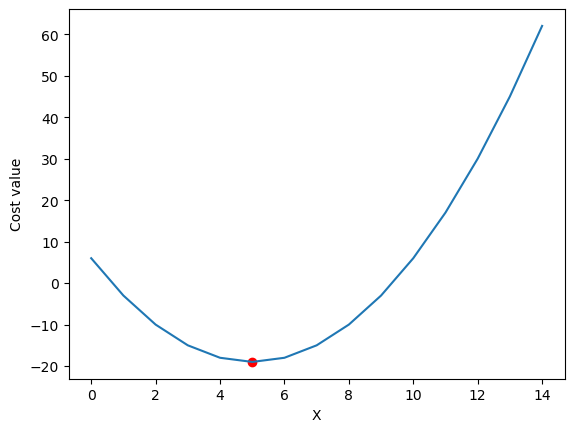

In [104]:
def cost(x : np.array) : 
    return x*x - 10*x + 6 

def grad(x : np.array) :  
    return 2*x - 10 


def Gradient_Descent(anpha, x_start) : 
    x = np.array([x_start])
    while(abs(grad(x[-1])) >= 1e-3) : 
        x_new = x[-1] - anpha * grad(x[-1]) 
        x = np.append(x, x_new) 

    return x 

x = Gradient_Descent(0.1, 0) 
y = cost(x) 
print("x value : ", x) 
print("Cost value at x min : ", cost(x[-1])) 
print("Gradient value at x min : ", grad(x[-1])) 
 
xplt = [] 
yplt = []
for i in range(15) : 
    xplt.append(i) 
    yplt.append(cost(xplt[-1])) 

plt.plot(xplt, yplt)
plt.xlabel('X') 
plt.ylabel('Cost value') 
plt.scatter(x[-1], cost(x[-1]), c='red', marker='o') 
plt.show()



#### momentum 

x values :  [-10.          -7.16092847  -3.81246735   0.74691932   3.96719815
   6.75012154   7.01177665   5.09879787   1.98049287  -0.8237492
  -3.86229243  -5.07317873  -5.50135389  -5.49606511  -5.09798026
  -4.09621492  -1.79746605   0.85563482   2.41655929   4.08655675
   5.35801509   4.82902593   3.27075783   2.20583474   1.39944545
   0.22329239  -1.8550775   -3.07412735  -2.55872167  -0.74822639
   0.29796797   0.22401427  -0.86236047  -2.31827243  -2.48514882
  -1.34614024  -0.27457557  -0.21779262  -1.09950623  -2.12718335
  -2.09853447  -1.14946308  -0.47438368  -0.6615099   -1.48668711
  -2.01601926  -1.65855525  -0.91748027  -0.67483967  -1.10230233
  -1.71810132  -1.7819273   -1.27341933  -0.85409163  -0.96278204
  -1.43928575  -1.71141376  -1.47389174  -1.06209657  -0.96610366
  -1.25499858  -1.57457916  -1.54350303  -1.23412382  -1.03920601
  -1.16284362  -1.43827963  -1.5306453   -1.34778559  -1.13482153
  -1.13848379  -1.33305477  -1.47706601  -1.40485606  -1.22407565

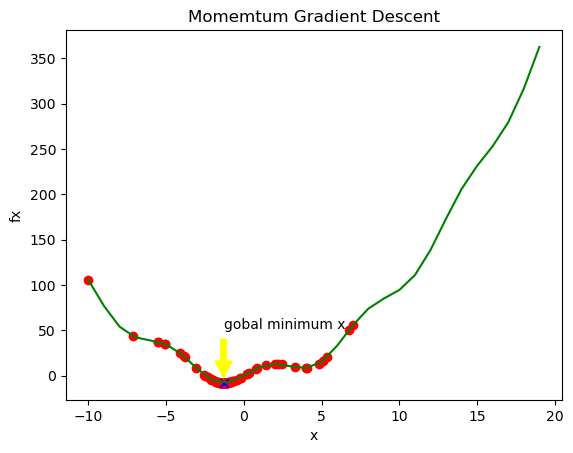

In [105]:

def momentum_fx(x : np.ndarray) : 
    return x*x + 10*math.sin(x)

def momentum_Fx(x : np.ndarray) : 
    return 2*x  + 10*math.cos(x)  

def momentum_GD(x_start, anpha) : 
    vt = 0 
    x = np.array([x_start])
    while(abs(momentum_Fx(x[-1])) > 1e-3) : 
        vt = 0.9*vt + anpha*momentum_Fx(x[-1]) 
        x_new = x[-1] - vt 
        x = np.append(x, x_new) 
    
    return x 

xplot = momentum_GD(-10, 0.1) 
yplot = [momentum_fx(i) for i in xplot] 
print("x values : ", xplot) 
print("Cost value at x min : ", momentum_fx(xplot[-1])) 
print("Gradient value at x min : ", momentum_Fx(xplot[-1])) 
x = [i for i in range(-10, 20)] 
y = [momentum_fx(i) for i in range(-10, 20)]
plt.plot(x, y, c='green') 
plt.title('Momemtum Gradient Descent')
plt.xlabel('x') 
plt.ylabel('fx') 
plt.scatter(xplot, yplot, c = 'red', marker = 'o')
plt.scatter(xplot[-1], yplot[-1], c = 'blue', marker = 'x')
plt.annotate(text="gobal minimum x", xy=(xplot[-1], yplot[-1]), xytext=(xplot[-1], yplot[-1]+60), arrowprops=dict(color = 'yellow', shrink = 0.1))
plt.show()
    
    

#### Stochastic Gradient Descent   & Mini-batch GD 

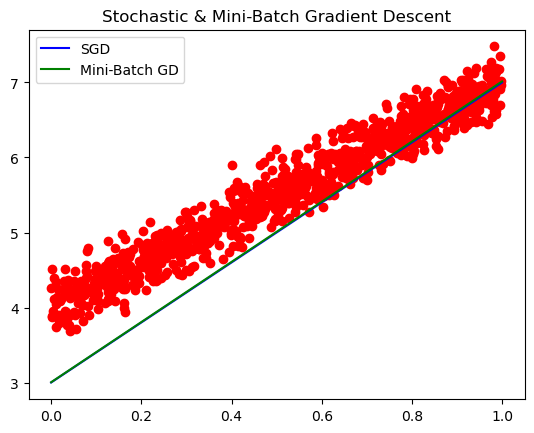

In [106]:
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)


def sgrad(w, i, rd_id):
    true_i = rd_id[i]
    xi = Xbar[true_i, :]
    yi = y[true_i]
    a = np.dot(xi, w) - yi
    return (xi*a).reshape(2, 1)

def SGD(w_init, eta):
    w = [w_init]
    N = X.shape[0]
    count = 0
    for it in range(100):
        # shuffle data 
        rd_id = np.random.permutation(N)
        for i in range(N):
            count += 1 
            g = sgrad(w[-1], i, rd_id)
            w_new = w[-1] - eta*g
            w.append(w_new)
    return w

def N_grad(w, i, rd_id, n) : 
    
    true_i = rd_id[i: i+n] 
    w = w.reshape(2, -1)
    xin = Xbar[true_i, :] 
    yin = y[true_i] 
    a = np.dot(xin, w) - yin 
    return (xin.T @ a)  
    

def MiniGD(w_init, eta, n) : 
    w = [w_init] 
    N = X.shape[0]
    count = 0
    for it in range(100):
        # shuffle data 
        rd_id = np.random.permutation(N)
        for i in range(0, N - n, n):
            count += 1 
            g = N_grad(w[-1], i, rd_id,n)
            w_new = w[-1] - eta*g
            w.append(w_new)

    return w

    


plt.scatter(X, y, color = "red") 
plt.title("Stochastic & Mini-Batch Gradient Descent")

w_init = np.array([0,0])
w = SGD(w_init, 0.01)[-1]

w_mini = MiniGD(w_init, 0.01, 5)[-1]

fx = lambda x : w[0][0]*x + w[1][0] 
fxmini = lambda x : w_mini[0][1]*x + w_mini[1][1]

x_plot = np.linspace(0, 1, 10) 
y_plot_mini = fxmini(x_plot) 
y_plot = fx(x_plot) 

plt.plot(x_plot, y_plot, color = 'blue', label = "SGD") 
plt.plot(x_plot, y_plot_mini, color = 'green', label = "Mini-Batch GD") 
plt.legend()
plt.show()
